<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/8)_B)_NY_Sentiment_Analysis_of_Topics_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import essential packages 
import re 
import string
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime

import collections
from collections import Counter 
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

import sklearn 
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.util import ngrams


# Mounting google colab on drive 
from google.colab import drive, files
import os
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NEWYORK_COVID19_TWEETS_TOPICS.csv')
tweets_df = data.iloc[: , 1:] 
tweets_df.drop_duplicates('Text', inplace = True)
tweets_df[:3]

,Datetime,Text,Text_Unprocessed,Sentiment_Score,Sentiment_Score_Norm,Sentiment,Topic
0,2021-05-30,pandemic democrats republicans refuse work gra...,during the pandemic democrats and republica...,-0.9118,4.410,negative,0
1,2021-05-30,stand congress location discrimination policy ...,stand up to the congress location di...,-0.6369,18.155,negative,0
2,2021-05-30,thank municipal bigwig vocal covid denial ceme...,no thanks to the municipal bigwig whose vocal...,-0.0015,49.925,neutral,3


In [3]:
tweets_df['Topic'] = tweets_df['Topic'].astype(str)

##Preping datasets and visualizations

In [4]:
# Changing the tweet sentiment dataset datetime field to datetime object
tweets_df['Datetime'] = pd.to_datetime(tweets_df['Datetime']) # converting to datetime
tweets_df['Datetime'] = tweets_df['Datetime'].dt.date # converting to just Year-Month-Day format 
tweets_df.Datetime.head(1), tweets_df.Datetime.tail(1)

(0    2021-05-30
 Name: Datetime, dtype: object, 554148    2020-04-14
 Name: Datetime, dtype: object)

In [5]:
# Cutting up the dataset into Topics
filter1_topics = tweets_df['Topic'] == '0'
Topic_1 = tweets_df[filter1_topics]

filter2_topics = tweets_df['Topic'] == '1'
Topic_2 = tweets_df[filter2_topics]

filter3_topics = tweets_df['Topic'] == '2'
Topic_3 = tweets_df[filter3_topics]

filter4_topics = tweets_df['Topic'] == '3'
Topic_4 = tweets_df[filter4_topics]

In [6]:
# Getting daily sentiments for topics 
group_topic1 = Topic_1['Sentiment_Score_Norm'].groupby(Topic_1['Datetime'])
sent_avgs_topic1 = group_topic1.mean()

group_topic2 = Topic_2['Sentiment_Score_Norm'].groupby(Topic_2['Datetime'])
sent_avgs_topic2 = group_topic2.mean()

group_topic3 = Topic_3['Sentiment_Score_Norm'].groupby(Topic_3['Datetime'])
sent_avgs_topic3 = group_topic3.mean()

group_topic4 = Topic_4['Sentiment_Score_Norm'].groupby(Topic_4['Datetime'])
sent_avgs_topic4 = group_topic4.mean()

In [7]:
grouped = tweets_df['Sentiment_Score_Norm'].groupby(tweets_df['Datetime'])
compound_sentiment_daily_avgs = grouped.mean()

In [8]:
newyork = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OxCGRT_New York.csv')

newyork['Date'] = pd.to_datetime(newyork['Date']) # converting to datetime
newyork['Date'] = newyork['Date'].dt.date # converting to just Year-Month-Day format 
newyork.Date.head(1), newyork.Date.tail(1)

(0    2020-03-01
 Name: Date, dtype: object, 456    2021-05-31
 Name: Date, dtype: object)

In [9]:
# Creating visual lines for the sentiment scores that will demonstrate the neutral zone
neutral_line = []
for i in range(457):
  neutral_line.append(50)

neutral_range_t = []
for i in range(457):
  neutral_range_t.append(52.5)

neutral_range_b = []
for i in range(457):
  neutral_range_b.append(47.5)

In [10]:
# Setting X and Y Values for Each Daily Sentiment 
# Topics
x_t1 = sent_avgs_topic1.index
y_t1 = sent_avgs_topic1

x_t2 = sent_avgs_topic2.index
y_t2 = sent_avgs_topic2

x_t3 = sent_avgs_topic3.index
y_t3 = sent_avgs_topic3

x_t4 = sent_avgs_topic4.index
y_t4 = sent_avgs_topic4

In [11]:
# Changing the index dates to ints so I can plot a trend line using polyfit
def reform_dates(dex):
  Datetime_Float = []
  day_str = []
  days = []
  for d in dex:
    day_str.append(str(d))
  for s in day_str:
    days.append(re.sub('[-]','', s))
  for r in days:
    Datetime_Float.append(int(r))
  return Datetime_Float

#Topics and Stringency Index 

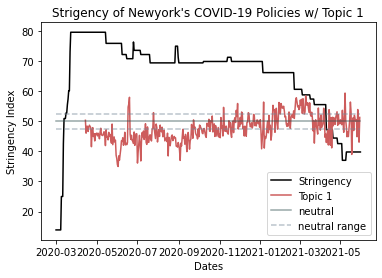

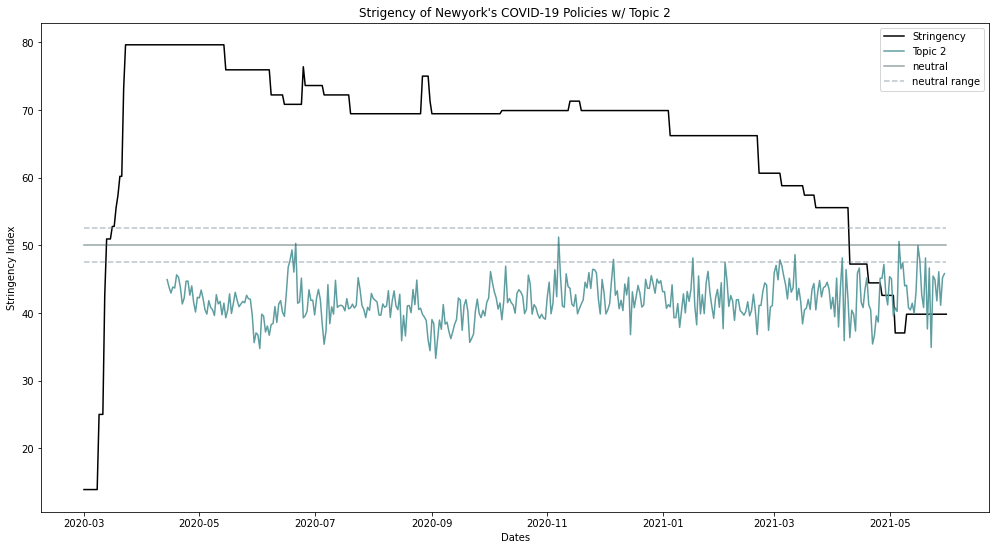

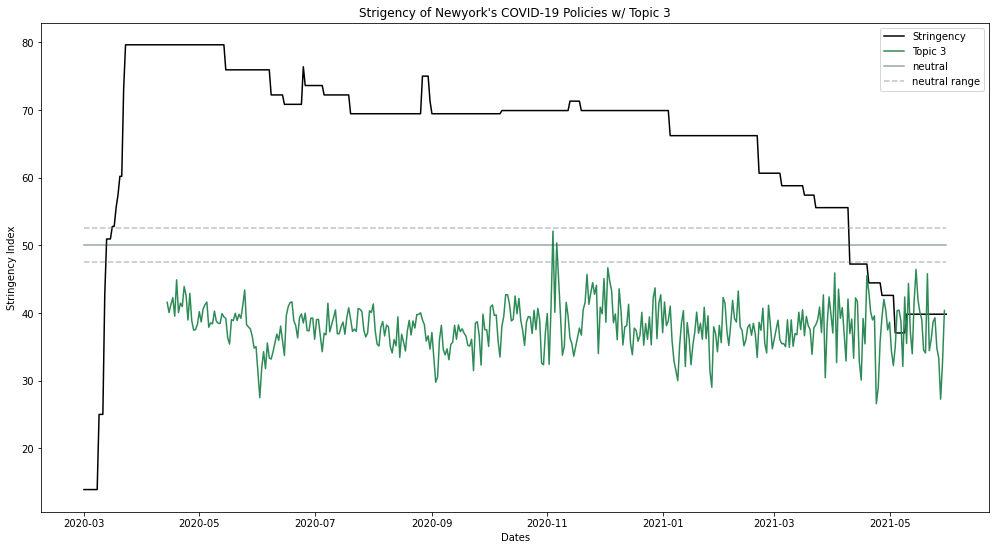

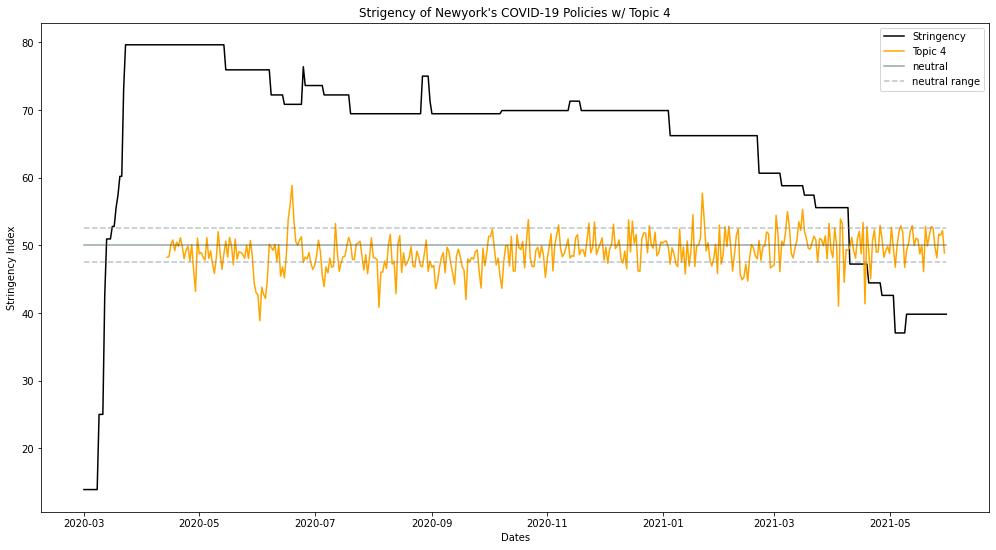

In [12]:
date = newyork['Date'].unique() 

stringency_NY = newyork['StringencyIndex']
plt.plot(date, stringency_NY, color = 'black', label = 'Stringency')
plt.plot(sent_avgs_topic1.index, y_t1, color = 'indianred', label = 'Topic 1')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Stringency Index")
plt.title("Strigency of Newyork's COVID-19 Policies w/ Topic 1")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

plt.plot(date, stringency_NY, color = 'black', label = 'Stringency')
plt.plot(sent_avgs_topic2.index, y_t2, color = 'cadetblue', label = 'Topic 2')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Stringency Index")
plt.title("Strigency of Newyork's COVID-19 Policies w/ Topic 2")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

plt.plot(date, stringency_NY, color = 'black', label = 'Stringency')
plt.plot(sent_avgs_topic3.index, y_t3, color = 'seagreen', label = 'Topic 3')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Stringency Index")
plt.title("Strigency of Newyork's COVID-19 Policies w/ Topic 3")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

plt.plot(date, stringency_NY, color = 'black', label = 'Stringency')
plt.plot(sent_avgs_topic4.index, y_t4, color = 'orange', label = 'Topic 4')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Stringency Index")
plt.title("Strigency of Newyork's COVID-19 Policies w/ Topic 4")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()



#Topics and Containment/health index 

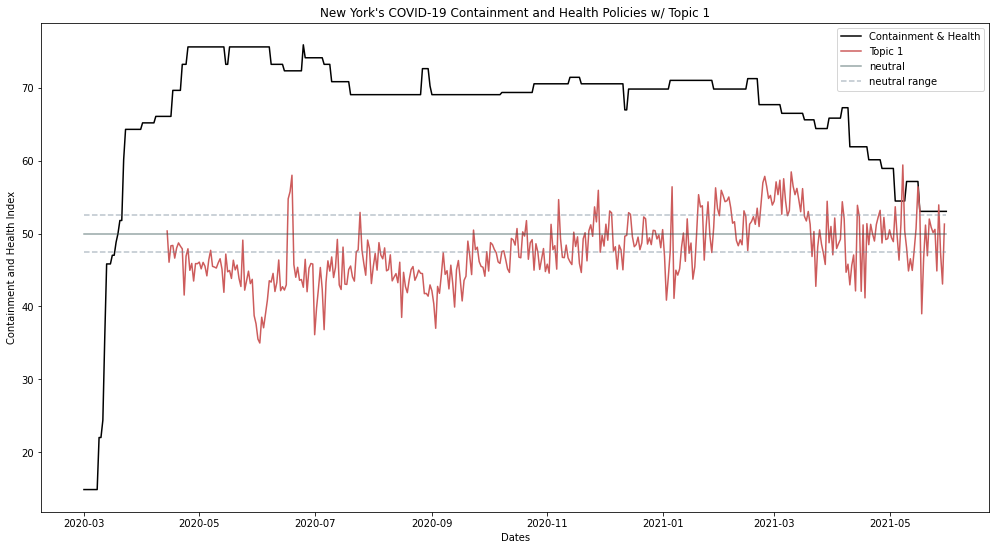

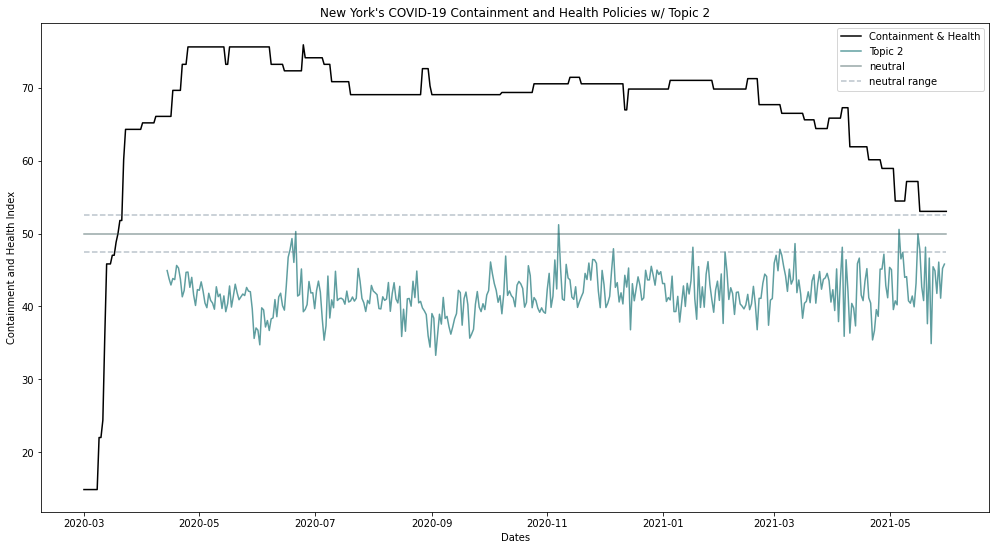

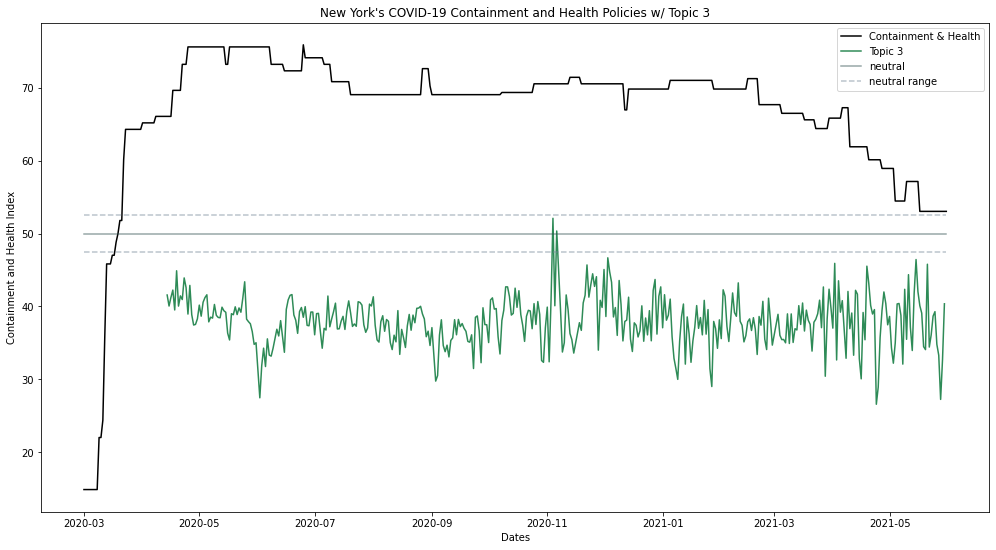

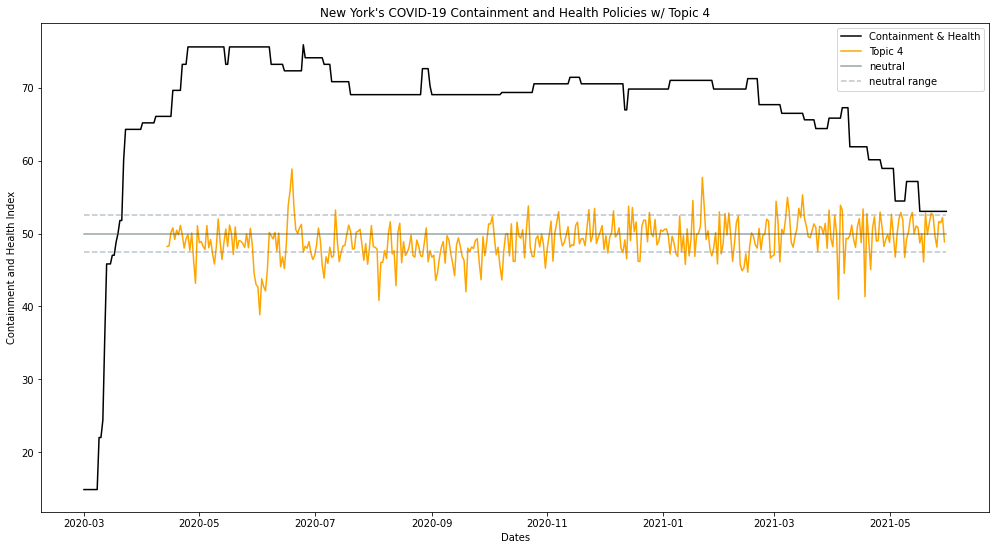

In [13]:
ch_NY = newyork['ContainmentHealthIndex']
plt.plot(date, ch_NY, color = 'black', label = 'Containment & Health')
plt.plot(sent_avgs_topic1.index, y_t1, color = 'indianred', label = 'Topic 1')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Containment and Health Index")
plt.title("New York's COVID-19 Containment and Health Policies w/ Topic 1")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

plt.plot(date, ch_NY, color = 'black', label = 'Containment & Health')
plt.plot(sent_avgs_topic2.index, y_t2, color = 'cadetblue', label = 'Topic 2')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Containment and Health Index")
plt.title("New York's COVID-19 Containment and Health Policies w/ Topic 2")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

plt.plot(date, ch_NY, color = 'black', label = 'Containment & Health')
plt.plot(sent_avgs_topic3.index, y_t3, color = 'seagreen', label = 'Topic 3')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Containment and Health Index")
plt.title("New York's COVID-19 Containment and Health Policies w/ Topic 3")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

plt.plot(date, ch_NY, color = 'black', label = 'Containment & Health')
plt.plot(sent_avgs_topic4.index, y_t4, color = 'orange', label = 'Topic 4')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Containment and Health Index")
plt.title("New York's COVID-19 Containment and Health Policies w/ Topic 4")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()


#Gov Response and Topics 

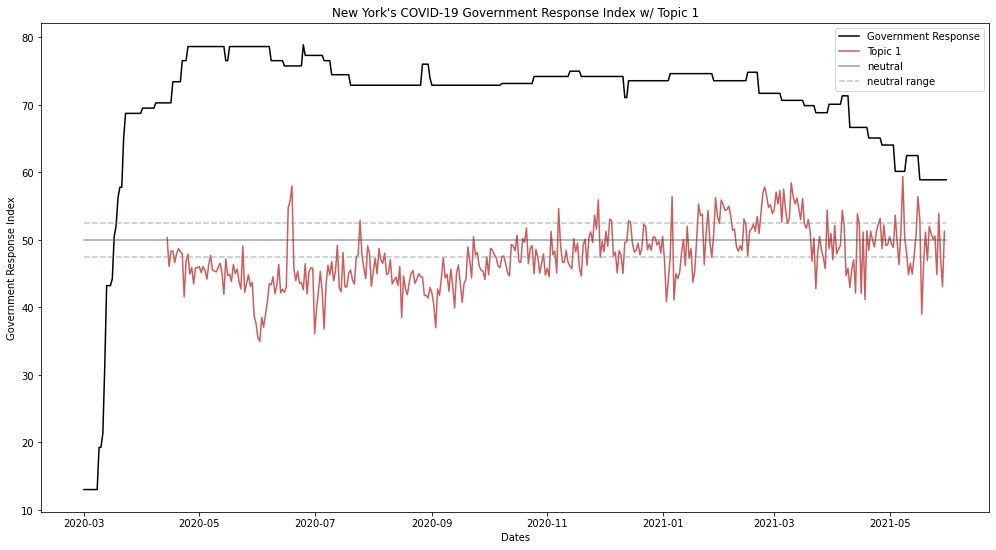

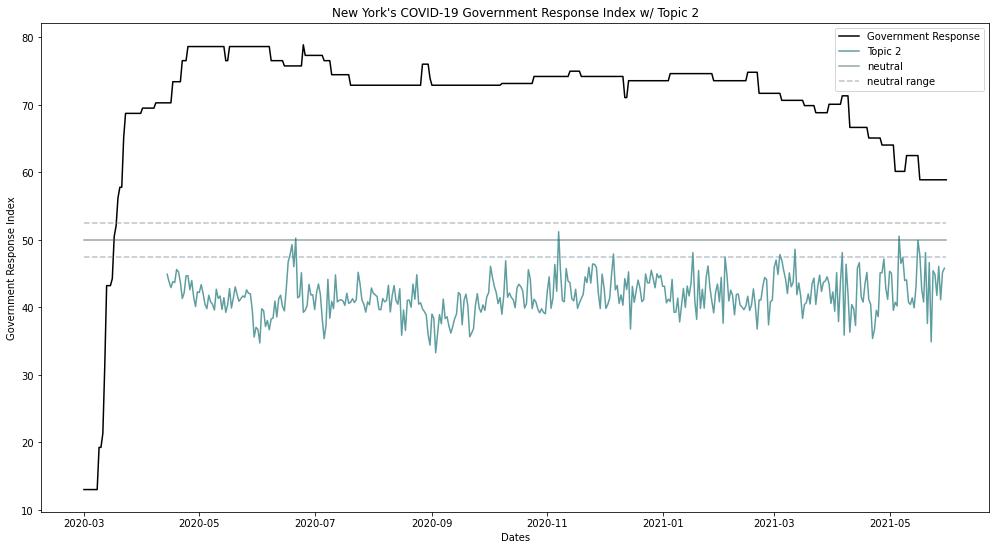

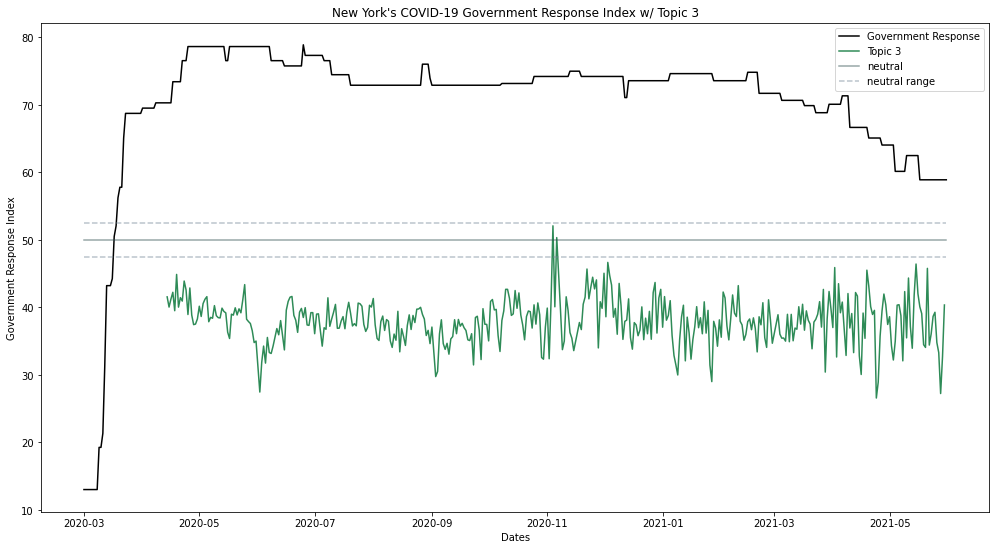

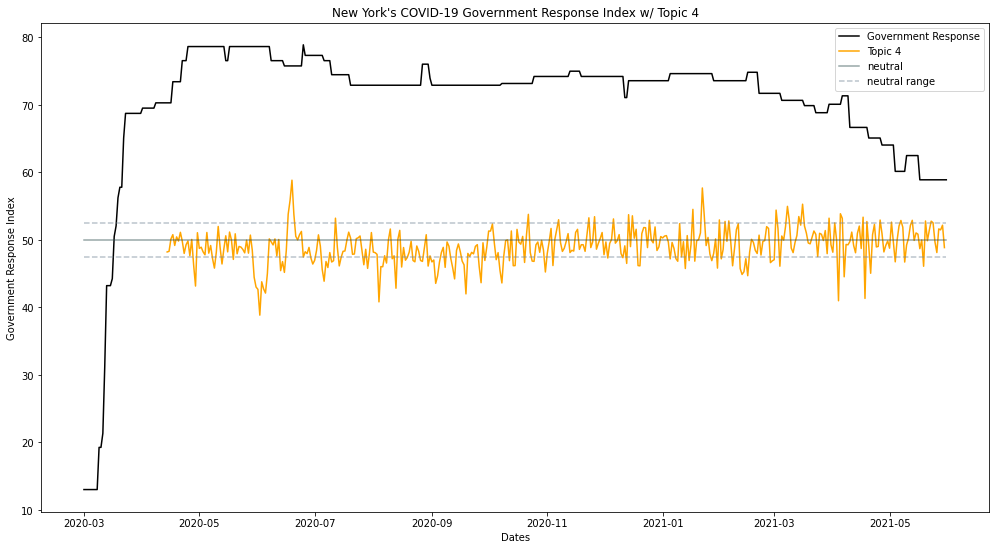

In [14]:
gr_NY = newyork['GovernmentResponseIndex']
plt.plot(date, gr_NY, color = 'black', label = 'Government Response')
plt.plot(sent_avgs_topic1.index, y_t1, color = 'indianred', label = 'Topic 1')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Government Response Index")
plt.title("New York's COVID-19 Government Response Index w/ Topic 1")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

plt.plot(date, gr_NY, color = 'black', label = 'Government Response')
plt.plot(sent_avgs_topic2.index, y_t2, color = 'cadetblue', label = 'Topic 2')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Government Response Index")
plt.title("New York's COVID-19 Government Response Index w/ Topic 2")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

plt.plot(date, gr_NY, color = 'black', label = 'Government Response')
plt.plot(sent_avgs_topic3.index, y_t3, color = 'seagreen', label = 'Topic 3')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Government Response Index")
plt.title("New York's COVID-19 Government Response Index w/ Topic 3")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

plt.plot(date, gr_NY, color = 'black', label = 'Government Response')
plt.plot(sent_avgs_topic4.index, y_t4, color = 'orange', label = 'Topic 4')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Government Response Index")
plt.title("New York's COVID-19 Government Response Index w/ Topic 4")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()


#Economic supports and Topics

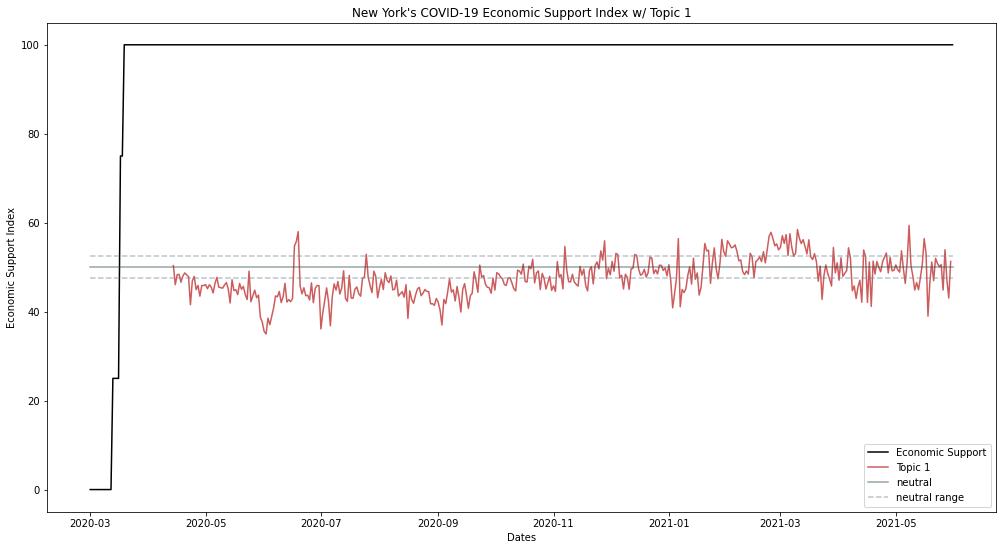

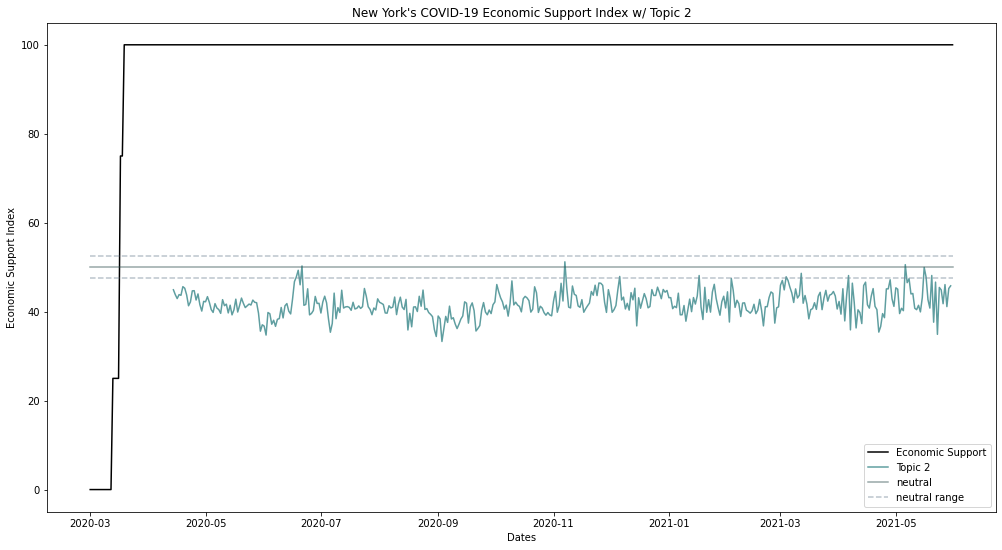

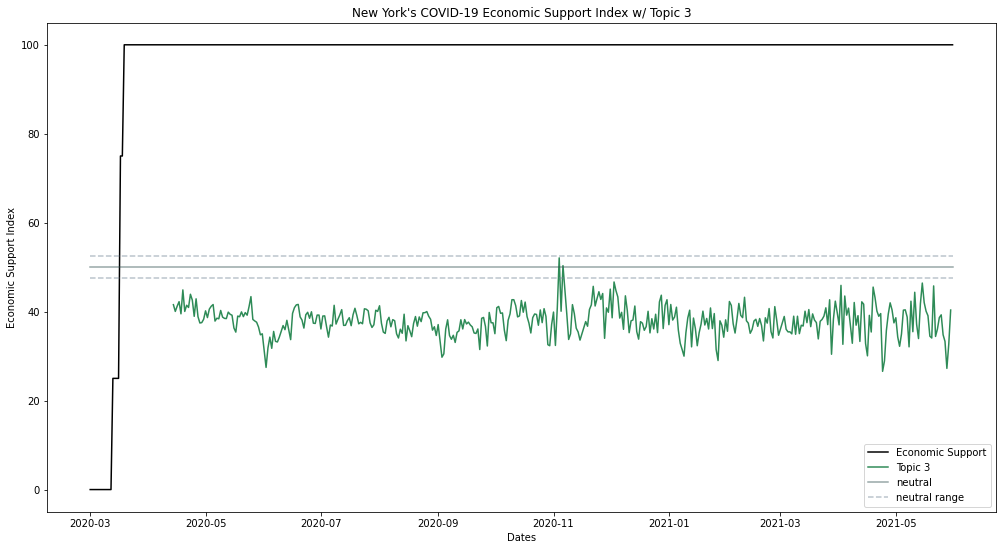

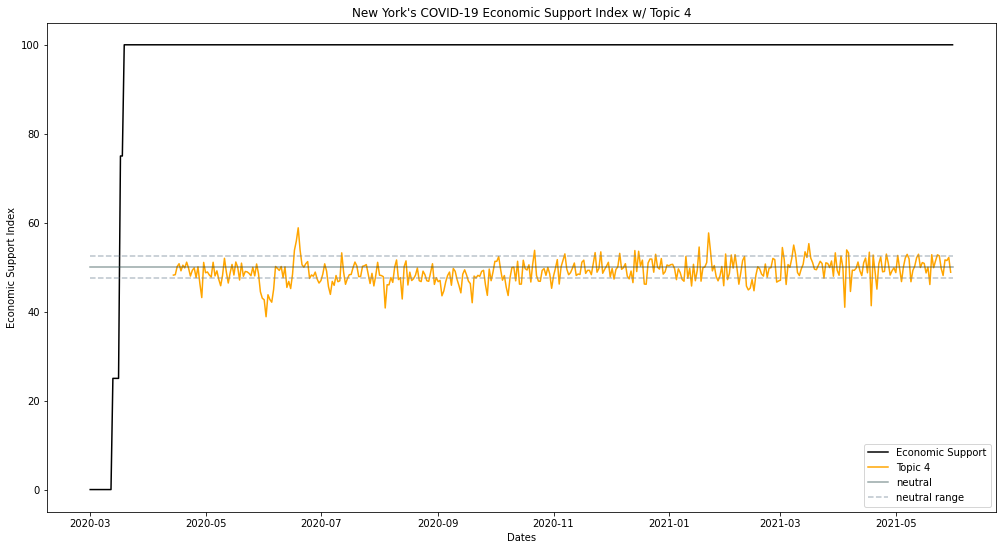

In [15]:
es_NY = newyork['EconomicSupportIndex']
plt.plot(date, es_NY, color = 'black', label = 'Economic Support')
plt.plot(sent_avgs_topic1.index, y_t1, color = 'indianred', label = 'Topic 1')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Economic Support Index")
plt.title("New York's COVID-19 Economic Support Index w/ Topic 1")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

plt.plot(date, es_NY, color = 'black', label = 'Economic Support')
plt.plot(sent_avgs_topic2.index, y_t2, color = 'cadetblue', label = 'Topic 2')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Economic Support Index")
plt.title("New York's COVID-19 Economic Support Index w/ Topic 2")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

plt.plot(date, es_NY, color = 'black', label = 'Economic Support')
plt.plot(sent_avgs_topic3.index, y_t3, color = 'seagreen', label = 'Topic 3')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Economic Support Index")
plt.title("New York's COVID-19 Economic Support Index w/ Topic 3")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()

plt.plot(date, es_NY, color = 'black', label = 'Economic Support')
plt.plot(sent_avgs_topic4.index, y_t4, color = 'orange', label = 'Topic 4')
plt.plot(date, neutral_line, color = 'darkslategrey', label='neutral', alpha=0.5)
plt.plot(date, neutral_range_t, color = 'lightslategrey', label='neutral range', linestyle='dashed', alpha=0.5)
plt.plot(date, neutral_range_b, color = 'lightslategrey', linestyle='dashed', alpha=0.5)
plt.xlabel("Dates")
plt.ylabel("Economic Support Index")
plt.title("New York's COVID-19 Economic Support Index w/ Topic 4")
plt.legend()
plt.rc('figure', figsize=(17, 9))
plt.show()


In [16]:
topics_fil = tweets_df['Sentiment_Score'].groupby(tweets_df['Topic'])
average_sent_perTopic = topics_fil.mean()

print('AVG SENTIMENT OF EACH TOPIC - NY:', '\n', average_sent_perTopic)

AVG SENTIMENT OF EACH TOPIC - NY: 
 Topic
0   -0.050933
1   -0.174067
2   -0.250419
3   -0.026199
Name: Sentiment_Score, dtype: float64


####Topics 1, 2, 3, 4

In [17]:
import random
print('TOPIC 1 TEXTS')
random.sample(list(Topic_1['Text_Unprocessed']), 15)

TOPIC 1 TEXTS


[' no the dems are using covid relief as a ruse to serve your own agenda by adding things that have nothing to do with covid',
 'congress we need you to prioritize a covid relief pkg that includes at least $b in dedicated funding to  now child care programs are closing and the families that depend on them have fewer and fewer options    ',
 '  we have a potus who knowingly withheld the truth about covid hes a known liar and put economy before people had he dealt with pandemic in beginning millions wouldnt be out of a job and need a stimulus package!   do your job!',
 ' you mean the non heroesact the totally partisan pork filled piece of crap pelosi passed taxpayer stimulus $ for illegals bailouts for states that had huge pre covid debt bailouts for pre covid underfunded pension plans like calpers nationalize vote harvesting and more crap',
 'millions more than your employer not if youre  and her bloodsucker husband   the same man who wanted to cut the supplies of blue states during a p

In [18]:
print('TOPIC 2 TEXTS')
random.sample(list(Topic_2['Text_Unprocessed']), 15)

TOPIC 2 TEXTS


[' we plan to play it safe and stay home was just curious i actually have a covid test monday so i can have a procedure done on my neck  guess ill leave home after that assuming negative',
 'i dont know one person who lives in nyc regardless of political affiliations or where they are on the political spectrum who likes our current mayor bdb has done nothing for our city he has fumbled the covid response (along with cuomo) installation of bike lanes',
 'maybe wait till the pandemic is actually over ',
 '   waaaaaaah! i know someone who died! waaaaaah!  people die every day   i dont see all of america demanding an end to wars of aggression which claims the lives of far more people than covid',
 '   you have the disease of lying! it will soon kill you! the liberal gov and mayors have destroyed ny nj minneapolis oregon and ill they control their own states not the federal government the china virus  was the culprit for causing deaths worldwide!',
 '    you mean the corona that  claimed we

In [19]:
print('TOPIC 3 TEXTS')
random.sample(list(Topic_3['Text_Unprocessed']), 15)

TOPIC 3 TEXTS


['    im sorry  but this virus kills lives faster than the economy  and the nursing homes agreed to that plan  they said they can treat those patients he didnt say here you go now  take care of these sick patients ',
 ' now you care you didnt care when you put covid patients in nursing homes fraud',
 '    cuomo is responsible for thousands of deaths it was under his order to put covid positive patients in the nursing homes',
 '   yeah and that order was based on federal guidelines and what was known at the time he did not do it on purpose my kids grandma died of presumed covid in a nursing home watch the press conference i dont see you getting all riled about desantis who lied about all his numbers',
 '        bye!! try not to take anyone else with you like trump is still doing and now not just by failed policy decisions and consistently lying to the public by pushing them to defy the cdc recommendations no now hes maybe killing ppl with his own personal self thats sick with covid!',
 

In [20]:
print('TOPIC 4 TEXTS')
random.sample(list(Topic_4['Text_Unprocessed']), 15)

TOPIC 4 TEXTS


[' please help us in wisconsin im afraid im going to die with this being out of control wisconsin reports more than  cases  deaths in worst day of pandemic yet  ',
 '  wearing a mask protects others not yourself so if everyone is wearing one  boom everyone has protection against catching the virus',
 '                                                 two of three americans are uncomfortable with returning to their places of work even as more and more states begin to reopen shuttered economies even as the pandemic grows if they now die their deaths shall  be on me its too early to reopen  ',
 '  there will never exist a day when we wake up and are at  risk of contracting this virus a vaccine will likely only target the most common strain and will only b a preventative measure at this point all we can do is be precautious so again i ask which  are you looking for',
 'this morning  and  outlined a preliminary plan for  to reopen in the fall while our city still fights against covid please 

In [21]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

topic1_list = Topic_1['Text'].tolist()
common_words = get_top_n_trigram(topic1_list, 15)

df_topic1 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic1['trigram'], y=df_topic1['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Topic 1"))
fig.show()

In [22]:
topic2_list = Topic_2['Text'].tolist()
common_words = get_top_n_trigram(topic2_list, 15)

df_topic2 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic2['trigram'], y=df_topic2['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Topic 2"))
fig.show()

In [23]:
topic3_list = Topic_3['Text'].tolist()
common_words = get_top_n_trigram(topic3_list, 15)

df_topic3 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic3['trigram'], y=df_topic3['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Topic 3"))
fig.show()

In [24]:
topic4_list = Topic_4['Text'].tolist()
common_words = get_top_n_trigram(topic4_list, 15)

df_topic4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic4['trigram'], y=df_topic4['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Topic 4"))
fig.show()

In [25]:
print('Topic 1 Max score:', max(Topic_1['Sentiment_Score']), '    ', 'Topic 1  Avg score:', Topic_1['Sentiment_Score'].mean(), '    ', 'Topic 1 Min score:', min(Topic_1['Sentiment_Score']))
print('Topic 2 Max score:', max(Topic_2['Sentiment_Score']), '    ', 'Topic 2 Avg score:', Topic_2['Sentiment_Score'].mean(), '    ', 'Topic 2 Min score:', min(Topic_2['Sentiment_Score']))
print('Topic 3 Max score:', max(Topic_3['Sentiment_Score']), '    ', 'Topic 3 Avg score:', Topic_3['Sentiment_Score'].mean(), '    ', 'Topic 3 Min score:', min(Topic_3['Sentiment_Score']))
print('Topic 4 Max score:', max(Topic_4['Sentiment_Score']), '    ', 'Topic 4 Avg score:', Topic_4['Sentiment_Score'].mean(), '    ', 'Topic 4 Min score:', min(Topic_4['Sentiment_Score']))

Topic 1 Max score: 0.9974      Topic 1  Avg score: -0.05093264107815832      Topic 1 Min score: -0.9933
Topic 2 Max score: 0.9968      Topic 2 Avg score: -0.17406741470487022      Topic 2 Min score: -0.9985
Topic 3 Max score: 0.9994      Topic 3 Avg score: -0.25041919929165907      Topic 3 Min score: -0.9916
Topic 4 Max score: 0.9991      Topic 4 Avg score: -0.026199026159578705      Topic 4 Min score: -0.9987


In [26]:
# Look at the highest and  lowest days
tweet_list = tweets_df['Sentiment_Score'].tolist()
highest_sents_df = tweets_df.nlargest(114, 'Sentiment_Score')
highest_sents_df

,Datetime,Text,Text_Unprocessed,Sentiment_Score,Sentiment_Score_Norm,Sentiment,Topic
25561,2021-03-20,🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 ...,🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...,0.9994,99.970,positive,2
290811,2020-08-23,funny obedience cult you re moron wear mask te...,too funny obedience cult youre the morons ...,0.9991,99.955,positive,3
155467,2020-11-21,hahhahahaha virus pandemic 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣 🤣...,hahhahahaha what virus what pandemic 🤣🤣🤣🤣🤣🤣🤣...,0.9987,99.935,positive,3
215898,2020-10-09,breakthru drug free free free free free free f...,breakthru drug free free free free free ...,0.9986,99.930,positive,3
156083,2020-11-21,emmy cuomos covid dr death nursing home debut ...,an emmy for cuomos covid dr death to nursing...,0.9974,99.870,positive,2
...,...,...,...,...,...,...,...
478997,2020-05-17,good gov cuomo know resident white house covid...,good on you gov cuomo! i know the resident in...,0.9800,99.000,positive,2
269019,2020-09-03,tweet stunt garner little bit support brain wa...,your tweet above is a stunt to garner a littl...,0.9799,98.995,positive,1
319674,2020-08-05,congratulation governor deserve honor thank co...,congratulations governor a well deserved hon...,0.9799,98.995,positive,0
185693,2020-11-07,today think tell single day height ny pandemic...,today i thought about what told us every sing...,0.9798,98.990,positive,1


##Negative Tweets 
#### saving negative tweets to their own dataframe and savingit to file

In [27]:
neg_filt = tweets_df['Sentiment'] == 'negative'
neg_tweets_df = tweets_df[neg_filt]
neg_tweets_df.to_csv('/content/drive/MyDrive/Colab Notebooks/NEWYORK_NEG_COVID19_TWEETS.csv')